In [1]:
import os
import tensorflow as tf

# Set CUDA device order and visible devices
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7,8,9"

# Set the device
device = '/cpu:0'
if tf.config.experimental.list_physical_devices('GPU'):
    try:
        # Restrict TensorFlow to only use the second GPU
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            tf.config.experimental.set_visible_devices(gpus[7], 'GPU')
            device = '/gpu:7'
    except RuntimeError as e:
        print(e)

print("device", device)

2024-08-27 17:38:06.434900: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 17:38:06.450346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 17:38:06.464060: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 17:38:06.468202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 17:38:06.481407: I tensorflow/core/platform/cpu_feature_guar

device /gpu:7


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import h5py

In [4]:

with h5py.File('/home/da886/ElectronCountingProject/Old Project/TrainingData5zeroes midpoints.h5', 'r') as hdf:
    ls = list(hdf.keys())
    images = hdf.get('images')
    # boxes = hdf.get('boxes')
    center_coordinates = hdf.get('center_coordinates')
    images = np.array(images)
    # boxes = np.array(boxes)
    center_coordinates = np.array(center_coordinates)

image_normalized = (images + 1e-9) / 9.26
# normalized_boxes = boxes / [1, 64, 64, 64, 64]

images_np = image_normalized
center_coordinates = center_coordinates / [1,64, 64]  # Normalizing the center coordinates
probabilities = np.array(center_coordinates[:,:, :-2])
probabilities = tf.expand_dims(probabilities, axis=1)
center_coordinates_np = np.array(center_coordinates[:, :, 1:])
center_coordinates_np = tf.expand_dims(center_coordinates_np, axis=1)
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices((images_np, {'x_prob_reshape': probabilities, 'x_midpoints_reshape': center_coordinates_np}))


2024-08-27 17:39:16.829813: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 7, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:c9:00.0, compute capability: 8.0


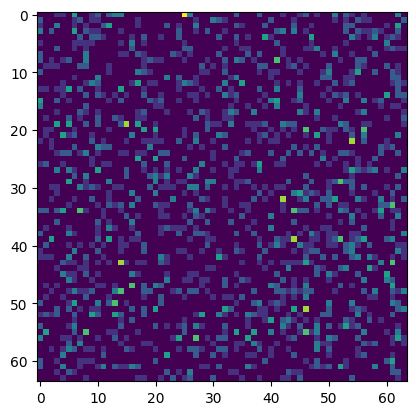

In [5]:
plt.imshow(images[2])

In [33]:
dataset = dataset.shuffle(buffer_size=256,reshuffle_each_iteration=True).batch(128)
# total_items = len(images_np)
# train_size = int(total_items * 0.9)
# test_size = total_items - train_size 

#     # Splitting the dataset
# train_dataset = dataset.take(train_size)
# test_dataset = dataset.skip(train_size)


# train_dataset = train_dataset.shuffle(buffer_size=train_size,reshuffle_each_iteration=True)
# train_dataset = train_dataset.batch(batch_size)
# test_dataset = test_dataset.batch(batch_size) 

In [65]:

# with h5py.File('/home/da886/ElectronCountingProject/final_combined_images_bboxes.h5', 'r') as hdf:
#     ls = list(hdf.keys())
#     images = hdf.get('images')
#     # boxes = hdf.get('boxes')
#     center_coordinates = hdf.get('center_coordinates')
#     images = np.array(images)
#     # boxes = np.array(boxes)
#     center_coordinates = np.array(center_coordinates)


In [5]:
center_coordinates

array([[[1.       , 0.734375 , 0.0234375],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        ...,
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ]],

       [[1.       , 0.9140625, 0.6015625],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        ...,
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ]],

       [[0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        ...,
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ],
        [0.       , 0.       , 0.       ]],

       ...,

       [[1.       , 0.0546875, 0.671875 ],
        [1.       , 0.3203125, 0.5859375],
        [1.       , 0.9375   , 0.7421875],
        ...,
        [0.       , 0.    

In [18]:

# image_normalized = (images + 1e-9) / 64
# # normalized_boxes = boxes / [1, 64, 64, 64, 64]

# images_np = image_normalized
# center_coordinates = center_coordinates / [1,64, 64]  # Normalizing the center coordinates
# probabilities = np.array(center_coordinates[:,:, :-2])
# probabilities = tf.expand_dims(probabilities, axis=1)
# center_coordinates_np = np.array(center_coordinates[:, :, 1:])
# center_coordinates_np = tf.expand_dims(center_coordinates_np, axis=1)
# batch_size = 128
# dataset = tf.data.Dataset.from_tensor_slices((images_np, {'x_prob_reshape': probabilities, 'x_midpoints_reshape': center_coordinates_np}))
# # dataset = dataset.shuffle(buffer_size=10000).batch(batch_size)
# total_items = len(images_np)
# train_size = int(total_items * 0.9)
# test_size = total_items - train_size 

#     # Splitting the dataset
# train_dataset = dataset.take(train_size)
# test_dataset = dataset.skip(train_size)


# train_dataset = train_dataset.shuffle(buffer_size=train_size,reshuffle_each_iteration=True)
# train_dataset = train_dataset.batch(batch_size)
# test_dataset = test_dataset.batch(batch_size) 

2024-07-15 22:00:23.976879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 7, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:c9:00.0, compute capability: 8.0


In [34]:
input_shape = (64, 64, 1)
num_classes = 280
num_coordinates = 2


x_input = layers.Input(shape=input_shape)
#Layer 1
x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x_input)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x) 
x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)

#Layer 2
x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
# x = layers.Dropout(0.3)(x) ###i just added this after first train
#Layer 3
x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
# x = layers.Dropout(0.4)(x) ###i just added this after first train
#Layer 4
x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

#Layer 5
x = layers.Conv2D(256, kernel_size=5, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x) 
# x = layers.Dropout(0.4)(x) ###i just added this after first train

x = layers.Flatten()(x)
# Probability output
x_prob = layers.Dense(num_classes, activation='sigmoid', name='x_prob')(x)
x_prob_reshape = layers.Reshape((-1, num_classes, 1), name='x_prob_reshape')(x_prob)

# Bounding box output
x_midpoints = layers.Dense(num_classes * num_coordinates, activation='sigmoid', name='x_midpoints')(x)
x_midpoints_reshape = layers.Reshape((-1, num_classes, num_coordinates), name='x_midpoints_reshape')(x_midpoints)




model = tf.keras.models.Model(x_input, [x_prob_reshape,x_midpoints_reshape])
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5) 
model.compile(optimizer= optimizer, loss= {'x_prob_reshape': tf.keras.losses.BinaryCrossentropy(), 'x_midpoints_reshape':tf.keras.losses.MeanSquaredError()})   
num_epochs = 1000

In [48]:
model = tf.keras.models.load_model("/home/da886/ElectronCountingProject/10000midpointsnew1.keras")  ##### from Jingru's dataset

In [5]:
# from tensorflow.keras import layers, callbacks
# reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=3e-11, verbose=1)

In [49]:
model.fit(dataset,epochs =500)

Epoch 1/500


2024-07-16 20:38:08.061252: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[2000,512,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[2000,512,8,8]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-07-16 20:38:08.387292: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.326109801s
Trying algorithm eng0{} for conv (f32[2000,512,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[2000,512,8,8]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_o

5/5 ━━━━━━━━━━━━━━━━━━━━ 198s 497ms/step - loss: 0.0600
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - loss: 0.0629
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0561
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0578
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - loss: 0.0535
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - loss: 0.0533
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0525
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0519
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0516
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0513
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - loss: 0.0512
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - loss: 0.0510
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - loss: 0.0509
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - loss: 0.0507
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - loss: 0.0506
Epoch 16/500
5

In [37]:
# model.save("/home/da886/ElectronCountingProject/10000midpointsnew1.h5")  ##### Jingrui's

In [38]:
dataset = tf.data.Dataset.from_tensor_slices((images_np, {'x_prob_reshape': probabilities, 'x_midpoints_reshape': center_coordinates_np}))
# test_dataset = dataset.take(train_size)
dataset = dataset.batch(2000)
inputs,targets = next(iter(dataset))
# inputs,targets = next(iter(test_dataset))
output =model.predict(inputs)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [9]:
n = model.evaluate(dataset)

KeyboardInterrupt: 

In [39]:
import tensorflow as tf

# r = np.random.randint(0,100)
tensor1 = tf.constant(targets['x_midpoints_reshape'], dtype=tf.float64)

tensor2 = tf.constant(output[1], dtype=tf.float32)


tensor2 = tf.cast(tensor2, tf.float64)


mse_loss_fn = tf.keras.losses.MeanSquaredError()
mse_loss = mse_loss_fn(tensor1, tensor2)

print("MSE Loss:", mse_loss.numpy())

MSE Loss: 0.018621594


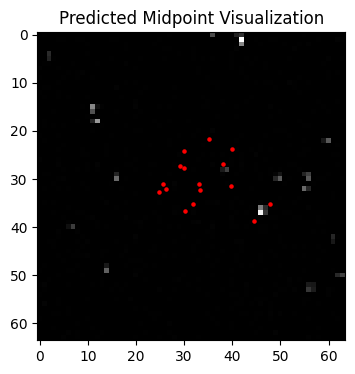

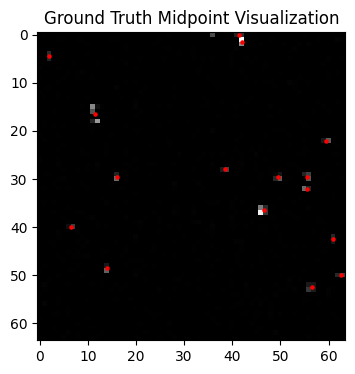

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_midpoints(image, probability_vector, midpoints, threshold=0.8):
    """
    Visualizes midpoints on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with midpoints.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    midpoints_np = midpoints#.numpy() if hasattr(midpoints, 'numpy') else midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Predicted Midpoint Visualization")

    # Plot midpoints based on probability threshold
    for i, (y,x) in enumerate(midpoints_np):
        prob = prob_vector_np[i]
        if prob > threshold:
            plt.scatter(x, y, color='red', s=5)
            # if i == 0:  # Add label only once to avoid repetition in the legend
            #     plt.legend()

    plt.show()
    
    

t = np.random.randint(0,2000)
# t=1
visualize_midpoints(tf.convert_to_tensor(inputs[t]), probabilities[t].numpy().squeeze(), tf.convert_to_tensor(output[1][t,0,:,:])*[64,64]) ##myprediction   

def visualize_midpoints2(image, probability_vector, midpoints, threshold=0.8):
    """
    Visualizes midpoints on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with midpoints.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    midpoints_np = midpoints#.numpy() if hasattr(midpoints, 'numpy') else midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Ground Truth Midpoint Visualization")

    # Plot midpoints based on probability threshold
    for i, (y,x) in enumerate(midpoints_np):
        prob = prob_vector_np[i]
        if prob > threshold:
            plt.scatter(x, y, color='red', s=5)
            # if i == 0:  # Add label only once to avoid repetition in the legend
            #     plt.legend()

    plt.show()     
visualize_midpoints2(tf.convert_to_tensor(images[t]), probabilities[t].numpy().squeeze(), tf.convert_to_tensor(center_coordinates_np[t,0,:,:])*[64,64]) ##ground truth          




In [77]:
import numpy as np

def evaluate_model(predictions, ground_truths, probability_threshold=0.9, midpoint_diff_threshold=0.05):
    pred_probabilities = predictions[0]
    pred_midpoints = predictions[1]
    gt_probabilities = ground_truths[0]
    gt_midpoints = ground_truths[1]
    
    # Valid predictions are those above the probability threshold
    valid_predictions = pred_probabilities > probability_threshold
    no_predictions = pred_probabilities <= probability_threshold

    # Calculate differences for midpoint evaluations
    midpoint_diff = np.abs(pred_midpoints - gt_midpoints)
    is_accurate_prediction = np.all(midpoint_diff <= midpoint_diff_threshold, axis=1)
    
    # True Positives: Valid predictions close enough to the ground truth
    TP = np.sum(np.logical_and(valid_predictions, is_accurate_prediction))
    
    # False Positives: Valid predictions not close enough to the ground truth
    FP = np.sum(np.logical_and(valid_predictions, ~is_accurate_prediction))
    
    # True Negatives: No predictions where no objects are actually present
    TN = np.sum(np.logical_and(no_predictions, gt_probabilities <= probability_threshold))
    
    # False Negatives: No predictions where objects are actually present
    FN = np.sum(np.logical_and(no_predictions, gt_probabilities > probability_threshold))
    
    # Metrics calculation
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    F1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    MAE = np.mean(midpoint_diff)
    MSE = np.mean(np.square(midpoint_diff))
    
    return precision, recall, F1_score, MAE, MSE

# Usage 
predictions = [output[0][0:800], output[1][0:800]]
ground_truths = [targets['x_prob_reshape'][0:800], targets['x_midpoints_reshape'][0:800]]
precision, recall, F1_score, MAE, MSE = evaluate_model(predictions, ground_truths)

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {F1_score}, MAE: {MAE}, MSE: {MSE}")


Precision: 0.8442052225194553, Recall: 1.0, F1 Score: 0.9155219952865624, MAE: 0.0016297489383693333, MSE: 7.1845121612086e-05


In [78]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
import tensorflow as tf  # Assuming TensorFlow is used for tensor conversion

def pos_deviation(coords, truth):
    """
    Calculate the distances between detected electron incident positions and the ground truth positions in units of pixels.
    """
    distances = []
    if len(coords) > 0:
        assignment, distances = pairwise_distances_argmin_min(coords, truth)
    return distances

def end2end_evaluation(groundtruth, predicted, tolerance):
    """
    Evaluate the model performance in detecting electron incident positions.

    Args:
    groundtruth: numpy array or TensorFlow tensor of ground truth electron positions.
    predicted: numpy array or TensorFlow tensor of predicted electron positions.
    tolerance: predictions with position error no larger than "tolerance" pixels will be selected as true positive.

    Returns:
    recall: recall of the prediction
    precision: precision of the prediction
    f1: F1 score
    dce: detector conversion efficiency (ratio of detected electrons to ground truth electrons)
    mae_position: mean position error (Euclidean distance) averaged over all detected electrons
    """

    # Convert TensorFlow tensors to NumPy arrays if necessary
    if isinstance(groundtruth, tf.Tensor):
        groundtruth = groundtruth.numpy()
    if isinstance(predicted, tf.Tensor):
        predicted = predicted.numpy()

    # Flatten the coordinates for comparison
    groundtruth_coords = groundtruth.reshape(-1, 2)
    predicted_coords = predicted.reshape(-1, 2)

    # Calculate the real total number of ground truth electrons
    num_groundtruth_electrons = len(groundtruth_coords)

    # Calculate the deviations between the predicted and ground truth positions
    deviations = pos_deviation(predicted_coords, groundtruth_coords)

    # Get the true positives, which have an error no larger than "tolerance" pixels
    true_positives = np.sum(deviations <= tolerance)

    # Calculate precision
    precision = true_positives / len(predicted_coords) if len(predicted_coords) > 0 else 0

    # Calculate recall
    recall = true_positives / num_groundtruth_electrons if num_groundtruth_electrons > 0 else 0

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Calculate detector conversion efficiency
    dce = len(predicted_coords) / num_groundtruth_electrons if num_groundtruth_electrons > 0 else 0

    # Calculate mean absolute error of positions
    mae_position = deviations.mean() if len(deviations) > 0 else 0

    # Print and return the evaluation metrics
    print('Recall:', recall, 'Precision:', precision, 'F1:', f1, 'DCE:', dce, 'MAE of positions:', mae_position)
    return recall, precision, f1, dce, mae_position


In [79]:

evaluation = end2end_evaluation(targets['x_midpoints_reshape'][0:600], output[1][0:600],0.05)

: 